## Comparison of K-Means and K-Medoid Algorithms

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [ ]:
# Step 1: Load the dataset
# Assuming 'spam_classification_dataset.csv' is in the current directory
df = pd.read_csv('spam_classification_dataset.csv')

# Display the first few rows of the dataset
print("Dataset preview:")
print(df.head())

Dataset preview:
   Email_Length  Hyperlinks  Keyword_Frequency  Special_Characters  Is_Spam
0            50           1                  2                   5        0
1           300           5                 20                  10        1
2           150           3                  8                   6        0
3           220           4                 15                   8        1
4            85           1                  5                   2        0


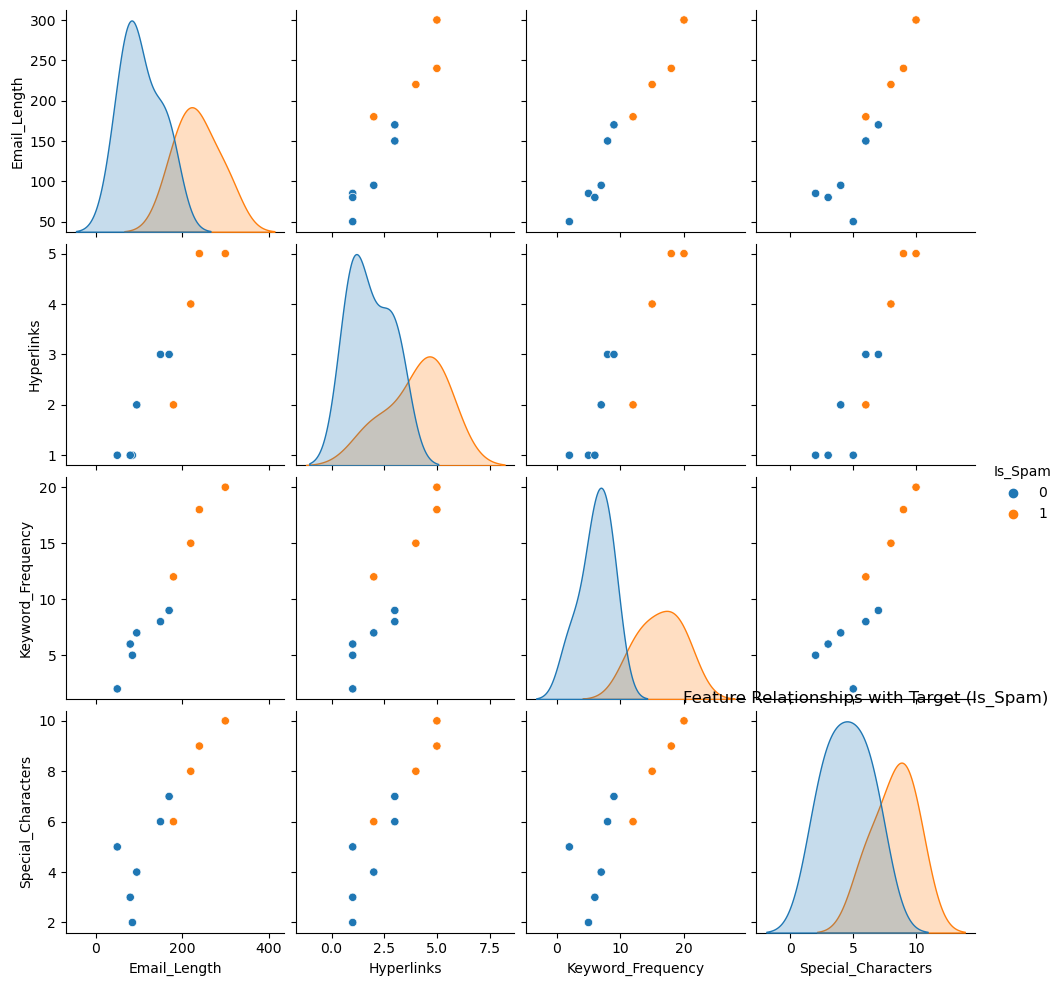

In [ ]:
# Step 2: Visualize the relationships between features and the target class using seaborn
sns.pairplot(df, hue='Is_Spam')
plt.title('Feature Relationships with Target (Is_Spam)')
plt.show()

In [ ]:
# Step 3: Split the dataset into features (X) and target (y)
X = df[['Email_Length', 'Hyperlinks', 'Keyword_Frequency', 'Special_Characters']]
y = df['Is_Spam']

In [ ]:
# Step 4: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Step 5: Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Step 6: Train an SVM model with a linear kernel on the scaled training data
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_scaled, y_train)

SVC(kernel='linear', random_state=42)

In [ ]:
# Step 7: Predict the target class on the test data and evaluate the model's accuracy
y_pred = svm_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy on test data: {accuracy:.2f}")

Model accuracy on test data: 1.00


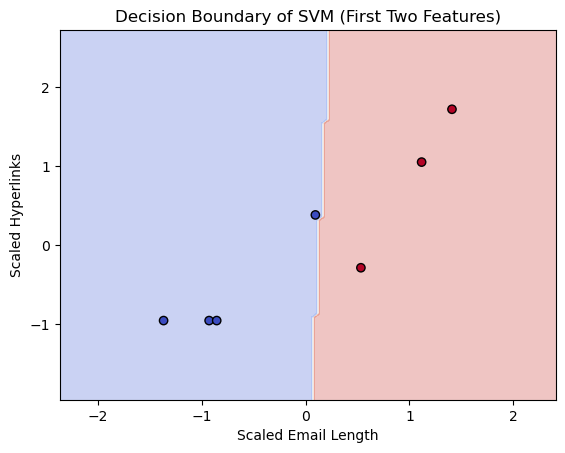

In [ ]:
# Step 8: Visualization of the decision boundary using the first two features
# Select the first two features for 2D visualization
X_train_2D = X_train_scaled[:, :2]
X_test_2D = X_test_scaled[:, :2]

# Train a new linear SVM model on this 2D feature space
svm_model_2D = SVC(kernel='linear', random_state=42)
svm_model_2D.fit(X_train_2D, y_train)

# Create a mesh grid to plot the decision boundary
x_min, x_max = X_train_2D[:, 0].min() - 1, X_train_2D[:, 0].max() + 1
y_min, y_max = X_train_2D[:, 1].min() - 1, X_train_2D[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Predict the decision boundary
Z = svm_model_2D.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary and the data points
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(X_train_2D[:, 0], X_train_2D[:, 1], c=y_train, cmap='coolwarm', edgecolors='k')
plt.title('Decision Boundary of SVM (First Two Features)')
plt.xlabel('Scaled Email Length')
plt.ylabel('Scaled Hyperlinks')
plt.show()

# CONCLUSION

The program illustrates the significance of feature scaling in SVM classification, as scaling improves the model's performance by ensuring that all features contribute equally to the decision boundary. Visualizing the decision boundary on scaled data highlights how the SVM model effectively separates the "Spam" and "Not Spam" classes, providing insights into its classification capabilities. The achieved accuracy score reflects the model's reliability, emphasizing the impact of scaling and proper data preprocessing on enhancing classification outcomes in spam detection.